Постановка задачи:

Решается задача о выявлении "аномальных" данных применительно к задачам диагностики состояния технических систем. Объектом исследования является роторно-опорная система на подшипниках жидкостного трения. Эксперимент на лабораторной установке проводился при двух состояниях: "нормальное" – без дефектов; "аномальное" - с ослабленным болтом станины подшипника.
На графике ниже представлен фрагмент нормированных данных, полученных в результате акустических измерений с помощью микрофона. Каждому номеру измерений соответствует кривая. Эти кривые представляются как отдельные точки m=401 мерного факторного пространства.

Необходимо разработать и протестировать программу для выявления "аномальных" режимов работы по данным эксперимента.
Датасет содержит 402 столбца, где первые 401 - значения признаков, последний метки классов: 1 - "аномальный" режим работы, 0 - "нормальный" режим работы. Значения признаков уже нормализованы, каждый в диапазоне $[0;1]$
Так как в реальных условиях "нормальных" данных существенно больше, чем "аномальных", то решать задачу классификации например с помощью логистической регрессии не корректно, т.к. модель будет аппроксимироваться в основном на "нормальных" данных и высокой точности предсказания "аномалий" ожидать не стоит. В данной задаче предлагается использовать смешанный подход: "частичное обучение с учителем", при котором разрабатывается статистическая модель, обучаемая на большом количестве «нормальных» данных, при этом процедуры валидации и тестирования производятся на выборках, содержащих как «нормальные», так и «аномальные» данные.

Описание метода:
Основными допущениями метода в отношении признаков является:
- признаки $X_{j}$ имеют нормальный закон распределения или близкий к нему с параметрами $(μ_{j},σ_{j})$;
- признаки слабо коррелируемы между собой.

На основании этих допущений по обучающей выборке строится статистическая модель $P(X)$ в виде произведения плотностей вероятностей каждого признака $X_{j}$: $$P(X)=\sqcap_{j=1}^{k}p(X_j,\mu_j,\sigma_j)$$
Фактически процесс обучения модели сводится к оценке параметров распределения $(μ_{j},σ_{j})$ каждого признака $X_{j}$.
Далее по валидационной выборке определяется граница $\varepsilon$ (линия уровня поверхности $P(X)$) исходя из условия максимальной точности прогноза.
Модель имеет вид:
$$if P(X_i) > \varepsilon: y_i=0$$
$$else: y_i=1$$

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)
%matplotlib inline

Метки классов удобно записать в переменные Cl_few=1, Cl_m=0

In [372]:
data=pd.read_csv('data_set_anomaly_detection.csv')
Cl_few, Cl_m = 1, 0

На графике представлен пример трех измерений, по оси Ox - номер признака, по оси Oy - значение признака

Text(0, 0.5, 'Feature value')

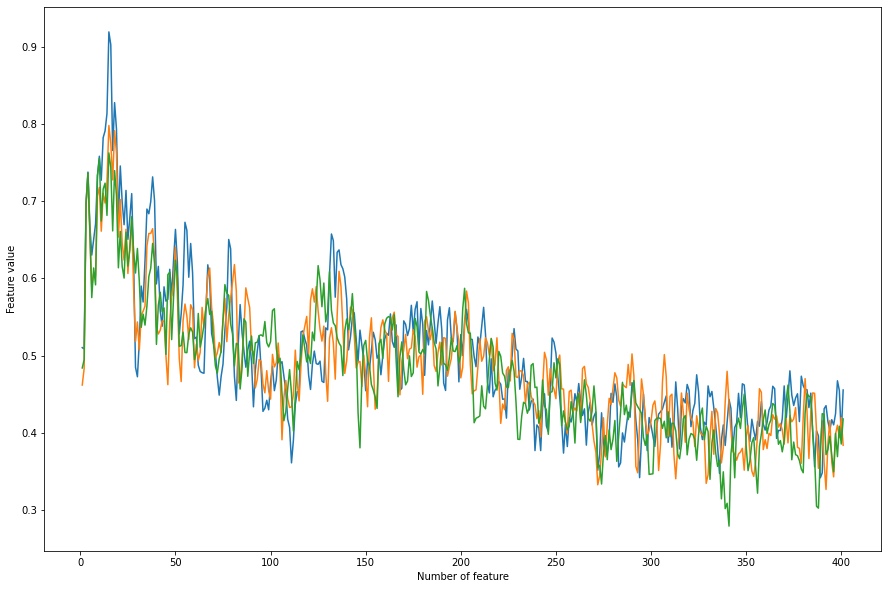

In [373]:
data
plt.figure(figsize=(15,10))
plt.plot(np.arange(1,data.shape[1]), data.iloc[:3,:data.shape[1]-1].T)
plt.xlabel('Number of feature')
plt.ylabel('Feature value')

Так как датасет содержит большое количество признаков (факторов), можно попробовать снизить размерность факторного пространства. Например, можно применить метод главных компонент (PCA).

Задание 1: с помощью метода PCA библиотеки sklearn  уменьшить размерность факторного пространства до m=12 факторов. Сформировать новый датафрейм из полученных признаков и столбца соответствующих меток ('anomaly')

In [15]:
from sklearn.decomposition import PCA
features=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12']
m=12


Выполнить разбиение данных на три выборки: выборка для обучения модели - только "нормальные" данные в объеме Ntr, выборка для валидации и тестирования - Ncvn, Ntsn "нормальных" и Ncva, Ntsa "аномальных" объектов. Учитывая, что исходный дата сет был упорядочен, выполнить рандомизацию объектов среди "нормальных"  и  "аномальных" данных соответственно. Так как в реальности исследуемые объекты работают чаще в нормальном режиме, то стоит полагать, что "аномальных" данных существенно меньше.

In [16]:
Ntr=2000
Ncvn, Ncva = 1500, 500
Ntsn, Ntsa = 500, 300


Задание 2: Построить гистограммы распределений каждого признака совместно с диаграммами рассеивания. Воспользоваться функцией pairplot библиотеки seaborn. Сделать выводы по графикам.

Ответ:


Задание 3: Под обучением модели в данном случае подразумевается расчет точечных оценок распределения каждого признака: среднего выборочного и выборочной дисперсии для каждого признака.

Написать функцию, которая рассчитывает значение модели в виде произведения плотностей вероятностей для каждой точки факторного пространства (т.е. для каждого объекта выборки). Сделать вычисления для валидационной выборки. Вычисления плотности вероятности для каждого признака записать в матричном виде.

Задание 4: Для предсказания номера класса написать функцию predict, которая на вход принимает значения левой части модели $P(X)$ и значение границы $\varepsilon$.

Объяснить почему для расчета точности модели для решаемой задачи нельзя использовать показатель accuracy.
Написать функцию Fscore для расчета точности прогноза модели, используя показатели Precision, Recall, F-score

Ответ:

Задание 5: Написать функцию threshold для определения границы $\varepsilon$ для модели. Так как граница соответствует одной из линий уровня поверхности $P(X)$, то ее можно найти простым перебором возможных значений в диапазоне $[P_{min}, P_{max}]$ с некоторым шагом. Критерием качества выбрать максимальное значение оценки F-score.

По валидационной выборке оценить оптимальное значение границы eps. Протестировать модель на тестовой выборке. Вывести значения оценок Precision, Recall, F-score. Сделать выводы по качеству предсказания модели.

Ответ:

Задание 6: Имеет смысл рассмотреть количество включенных в модель главных факторов m как гиперпараметр. И подобрать это гиперпараметр так, чтобы найти компромисс между оценками Precision и Recall.
В датафреймах df_norm, df_anom хранятся данные для m=12 факторов и соответствующие значения классов. Пройтись в цикле по количеству факторов $k$ в диапазоне $[1;m]$ и рассчитать указанные оценки для каждого $k$. Результат представить в виде трех графиков оценок от $k$ на одной плоскости. По графикам выбрать значение $k$. Описать полученный результат.

In [17]:
k=np.arange(1,m+1)
Pre_ts, Rec_ts, F1_ts = np.zeros(k.shape[0]), np.zeros(k.shape[0]), np.zeros(k.shape[0])


Ответ: